In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def g(x):
    return x**(np.cos(x)) + np.cos(2*x)
a = 0
b = 4 * np.pi

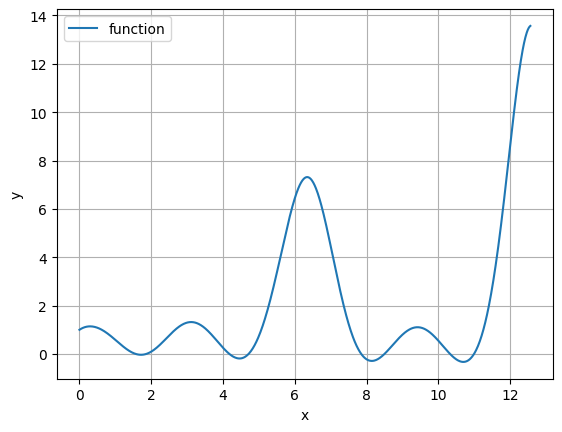

In [4]:
def fun_painter(a, b, func, names, points = None):
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(len(func)):
        x = np.linspace(a, b, 1000)
        y = func[i](x)
        plt.plot(x, y, label=names[i])
    plt.legend()  
    
    if points is not None:
        plt.plot(points[0], points[1], marker='o', linestyle='')
    plt.show()

fun_painter(a, b, [g], ["function"])

In [5]:
def generate_regular(a, b, f, n):
    x = np.linspace(a, b, n)
    y = f(x)
    return x, y

In [6]:
def generate_chebyshev(a, b, f, n):
    x = []
    for k in range(n, 0, -1):
        x.append(.5*(a+b) + .5*(b-a)*np.cos((2*k-1)*np.pi/(2*n)))
    x = np.array(x)
    y = f(x)
    return x, y

In [7]:
def lagrange(xs, ys):
    L = [0] * len(xs)
    for i in range(len(xs)):
        m = 1
        for xk in xs:
            if xs[i] != xk:
                m *= (xs[i]-xk)
        L[i] = (ys[i]/m)
        
    def f(x):
        res = 0
        for j in range(len(xs)):
            fun = 1
            for xl in xs:
                if xs[j] != xl:
                    fun *= (x - xl)
            res += L[j] * fun
        return res
    return f

In [8]:
def newton(xs, ys):
    l = len(xs)
    f_arr = [[ys[i]] for i in range(l)]
    for i in range(1, l):
        for j in range(1, i+1):
            f_arr[i].append((f_arr[i][j-1] - f_arr[i-1][j-1]) / (xs[i] - xs[i-j]))
    def f(x):
        y = ys[0]
        for ii in range(1, l):
            temp = f_arr[ii][ii]
            for jj in range(ii):
                temp *= (x - xs[jj])
            y += temp
        return y
    return f

In [9]:
def newton_even(xs, ys):
    l = len(xs)

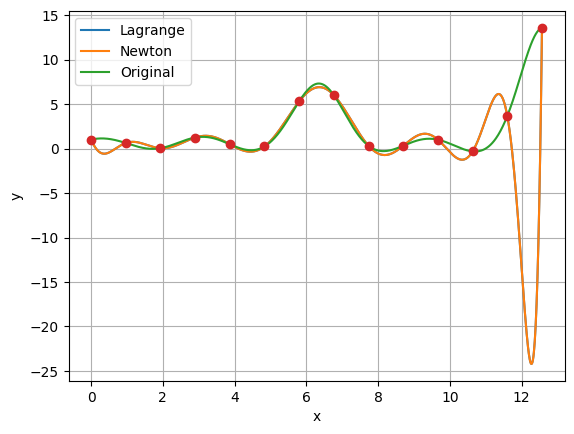

In [10]:
n=14
pr = generate_regular(a, b, g, n)
fun_painter(a, b, [lagrange(*pr), newton(*pr), g], ["Lagrange","Newton", "Original"], pr)

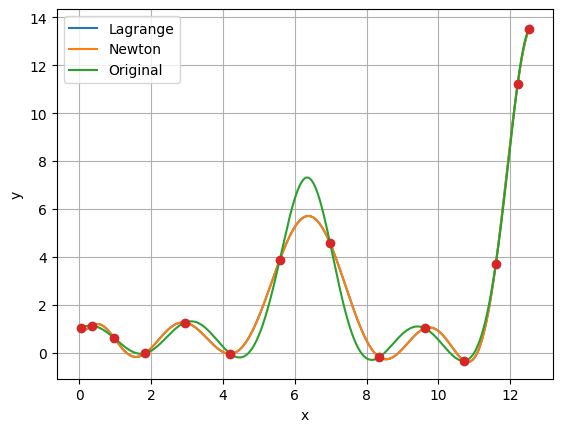

In [11]:
pc = generate_chebyshev(a, b, g, n)
fun_painter(a, b, [lagrange(*pc), newton(*pc), g], ["Lagrange", "Newton", "Original"], pc)